<a href="https://www.kaggle.com/code/kevinnkansah/acc-0-84-img2vec-neural-network?scriptVersionId=184280079" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install -q img2vec_pytorch

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import plotly.express as px
from PIL import Image
from img2vec_pytorch import Img2Vec
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)


### Loading in the data

In [3]:
BUTTER = "/kaggle/input/diary-products-computer-vision/diary-products/train/butter"
CHEESE = "/kaggle/input/diary-products-computer-vision/diary-products/train/cheese"
COTTAGE_CHEESE = "/kaggle/input/diary-products-computer-vision/diary-products/train/cottage cheese"
CREAM = "/kaggle/input/diary-products-computer-vision/diary-products/train/cream"
ICE_CREAM = "/kaggle/input/diary-products-computer-vision/diary-products/train/ice cream"
KEFIR = "/kaggle/input/diary-products-computer-vision/diary-products/train/kefir"
MILK = "/kaggle/input/diary-products-computer-vision/diary-products/train/milk"
SOURCREAM = "/kaggle/input/diary-products-computer-vision/diary-products/train/sourcream"
    
file_paths = [os.path.join(BUTTER, f) for f in os.listdir(BUTTER)] + [os.path.join(CHEESE, f) for f in os.listdir(CHEESE)] + [os.path.join(COTTAGE_CHEESE, f) for f in os.listdir(COTTAGE_CHEESE)] + [os.path.join(CREAM, f) for f in os.listdir(CREAM)] + [os.path.join(ICE_CREAM, f) for f in os.listdir(ICE_CREAM)] + [os.path.join(KEFIR, f) for f in os.listdir(KEFIR)] + [os.path.join(MILK, f) for f in os.listdir(MILK)] + [os.path.join(SOURCREAM, f) for f in os.listdir(SOURCREAM)]

label = ['Butter'] * len(os.listdir(BUTTER)) + ['Cheese'] * len(os.listdir(CHEESE)) + ['Cottage Cheese'] * len(os.listdir(COTTAGE_CHEESE)) + ['Cream'] * len(os.listdir(CREAM)) + ['Ice Cream'] * len(os.listdir(ICE_CREAM)) + ['Kefir'] * len(os.listdir(KEFIR)) + ['Milk'] * len(os.listdir(MILK)) + ['Sour Cream'] * len(os.listdir(SOURCREAM))

train_df = pd.DataFrame({'file_path': file_paths, 'label': label})

train_df.sample(10)



file_path  \
714       /kaggle/input/diary-products-computer-vision/diary-products/train/ice cream/116.jpg   
375   /kaggle/input/diary-products-computer-vision/diary-products/train/cottage cheese/13.jpg   
399   /kaggle/input/diary-products-computer-vision/diary-products/train/cottage cheese/21.jpg   
1045       /kaggle/input/diary-products-computer-vision/diary-products/train/sourcream/98.jpg   
1084       /kaggle/input/diary-products-computer-vision/diary-products/train/sourcream/88.jpg   
194          /kaggle/input/diary-products-computer-vision/diary-products/train/cheese/137.jpg   
814           /kaggle/input/diary-products-computer-vision/diary-products/train/kefir/104.jpg   
8            /kaggle/input/diary-products-computer-vision/diary-products/train/butter/143.jpg   
1025        /kaggle/input/diary-products-computer-vision/diary-products/train/sourcream/8.jpg   
327   /kaggle/input/diary-products-computer-vision/diary-products/train/cottage cheese/10.jpg   

               label  
714        Ice Cream  
375   Cottage Cheese  
399   Cottage Cheese  
1045      Sour Cream  
1084      Sour Cream  
194           Cheese  
814            Kefir  
8             Butter  
1025      Sour Cream  
327   Cottage Cheese

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  1138 non-null   object
 1   label      1138 non-null   object
dtypes: object(2)
memory usage: 17.9+ KB


In [5]:
BUTTER = "/kaggle/input/diary-products-computer-vision/diary-products/test/butter"
CHEESE = "/kaggle/input/diary-products-computer-vision/diary-products/test/cheese"
COTTAGE_CHEESE = "/kaggle/input/diary-products-computer-vision/diary-products/test/cottage cheese"
CREAM = "/kaggle/input/diary-products-computer-vision/diary-products/test/cream"
ICE_CREAM = "/kaggle/input/diary-products-computer-vision/diary-products/test/ice cream"
KEFIR = "/kaggle/input/diary-products-computer-vision/diary-products/test/kefir"
MILK = "/kaggle/input/diary-products-computer-vision/diary-products/test/milk"
SOURCREAM = "/kaggle/input/diary-products-computer-vision/diary-products/test/sourcream"

file_paths = [os.path.join(BUTTER, f) for f in os.listdir(BUTTER)] + [os.path.join(CHEESE, f) for f in os.listdir(CHEESE)] + [os.path.join(COTTAGE_CHEESE, f) for f in os.listdir(COTTAGE_CHEESE)] + [os.path.join(CREAM, f) for f in os.listdir(CREAM)] + [os.path.join(ICE_CREAM, f) for f in os.listdir(ICE_CREAM)] + [os.path.join(KEFIR, f) for f in os.listdir(KEFIR)] + [os.path.join(MILK, f) for f in os.listdir(MILK)] + [os.path.join(SOURCREAM, f) for f in os.listdir(SOURCREAM)]

label = ['Butter'] * len(os.listdir(BUTTER)) + ['Cheese'] * len(os.listdir(CHEESE)) + ['Cottage Cheese'] * len(os.listdir(COTTAGE_CHEESE)) + ['Cream'] * len(os.listdir(CREAM)) + ['Ice Cream'] * len(os.listdir(ICE_CREAM)) + ['Kefir'] * len(os.listdir(KEFIR)) + ['Milk'] * len(os.listdir(MILK)) + ['Sour Cream'] * len(os.listdir(SOURCREAM))

test_df = pd.DataFrame({'file_path': file_paths, 'label': label})

test_df.sample(10)


file_path  \
45            /kaggle/input/diary-products-computer-vision/diary-products/test/cheese/16.jpg   
205           /kaggle/input/diary-products-computer-vision/diary-products/test/kefir/168.jpg   
269        /kaggle/input/diary-products-computer-vision/diary-products/test/sourcream/80.jpg   
150        /kaggle/input/diary-products-computer-vision/diary-products/test/ice cream/99.jpg   
181        /kaggle/input/diary-products-computer-vision/diary-products/test/ice cream/19.jpg   
209           /kaggle/input/diary-products-computer-vision/diary-products/test/kefir/154.jpg   
268       /kaggle/input/diary-products-computer-vision/diary-products/test/sourcream/145.jpg   
27            /kaggle/input/diary-products-computer-vision/diary-products/test/butter/95.jpg   
247             /kaggle/input/diary-products-computer-vision/diary-products/test/milk/95.jpg   
84   /kaggle/input/diary-products-computer-vision/diary-products/test/cottage cheese/117.jpg   

              label  
45           Cheese  
205           Kefir  
269      Sour Cream  
150       Ice Cream  
181       Ice Cream  
209           Kefir  
268      Sour Cream  
27           Butter  
247            Milk  
84   Cottage Cheese

### Data Visualization

In [6]:
px.pie(train_df, names='label', title='Distribution of train labels')


In [7]:
px.pie(test_df, names='label', title='Distribution of test labels')

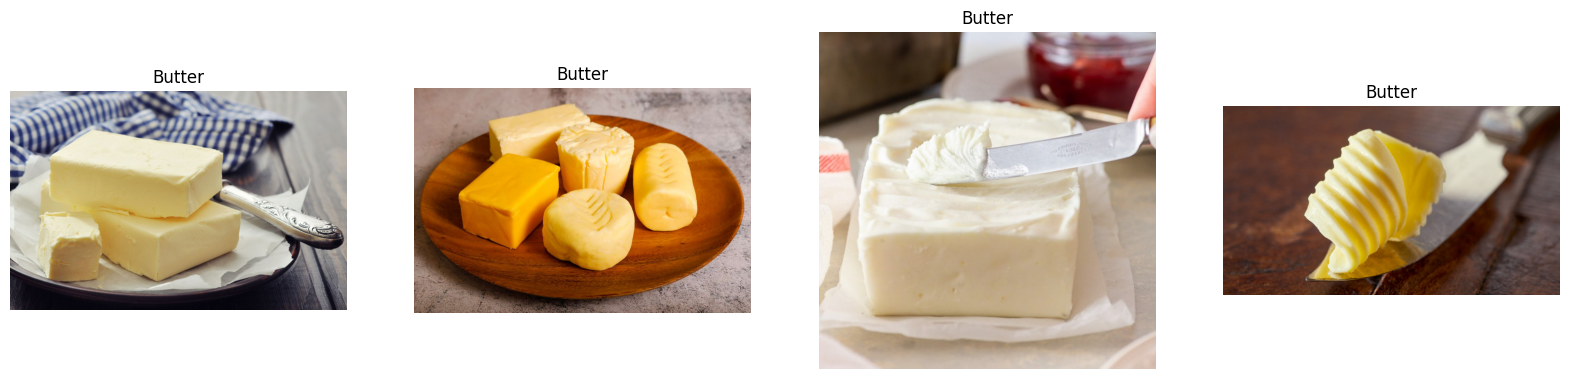

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(20, 20))

for i in range(1, 5):
    file_name = '/kaggle/input/diary-products-computer-vision/diary-products/train/butter/' + str(i) + ".jpg"
    image = imread(file_name)
    ax = axs[i-1]
    ax.set_title("Butter")
    ax.imshow(image)
    ax.axis('off') 
    
plt.show()

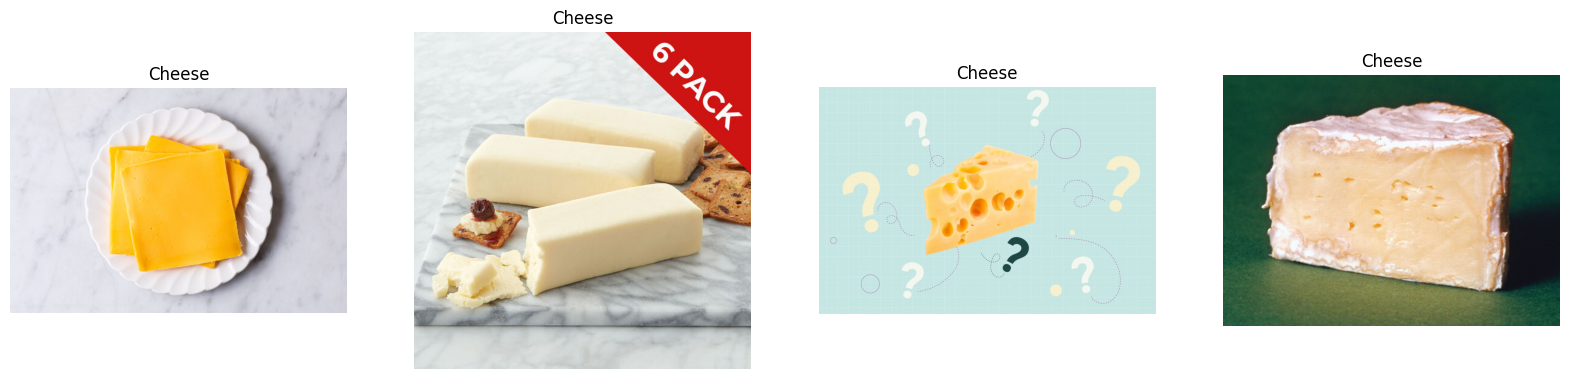

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(20, 20))

for i in range(1, 5):
    file_name = "/kaggle/input/diary-products-computer-vision/diary-products/train/cheese/" + str(i+3) + ".jpg"
    image = imread(file_name)
    ax = axs[i-1]
    ax.set_title("Cheese")
    ax.imshow(image)
    ax.axis('off') 
    
plt.show()

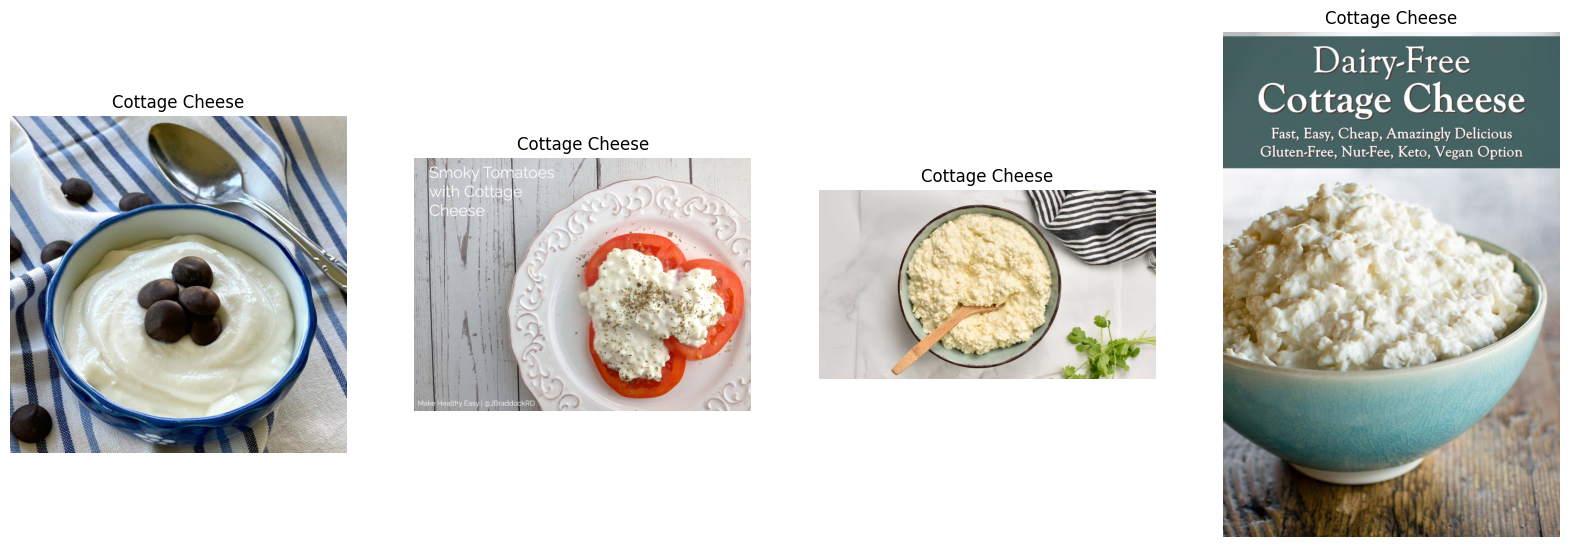

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(20, 20))

for i in range(1, 5):
    file_name = "/kaggle/input/diary-products-computer-vision/diary-products/train/cottage cheese/" + str(i+3) + ".jpg"
    image = imread(file_name)
    ax = axs[i-1]
    ax.set_title("Cottage Cheese")
    ax.imshow(image)
    ax.axis('off') 
    
plt.show()

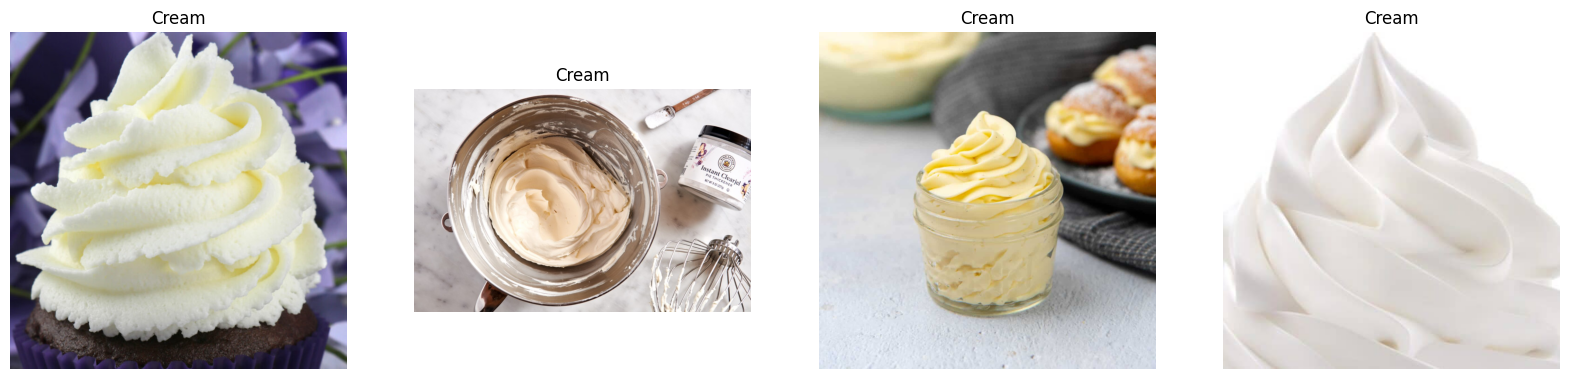

In [11]:
fig, axs = plt.subplots(1, 4, figsize=(20, 20))

for i in range(1, 5):
    file_name = "/kaggle/input/diary-products-computer-vision/diary-products/train/cream/" + str(i+9) + ".jpg"
    image = imread(file_name)
    ax = axs[i-1]
    ax.set_title("Cream")
    ax.imshow(image)
    ax.axis('off') 
    
plt.show()

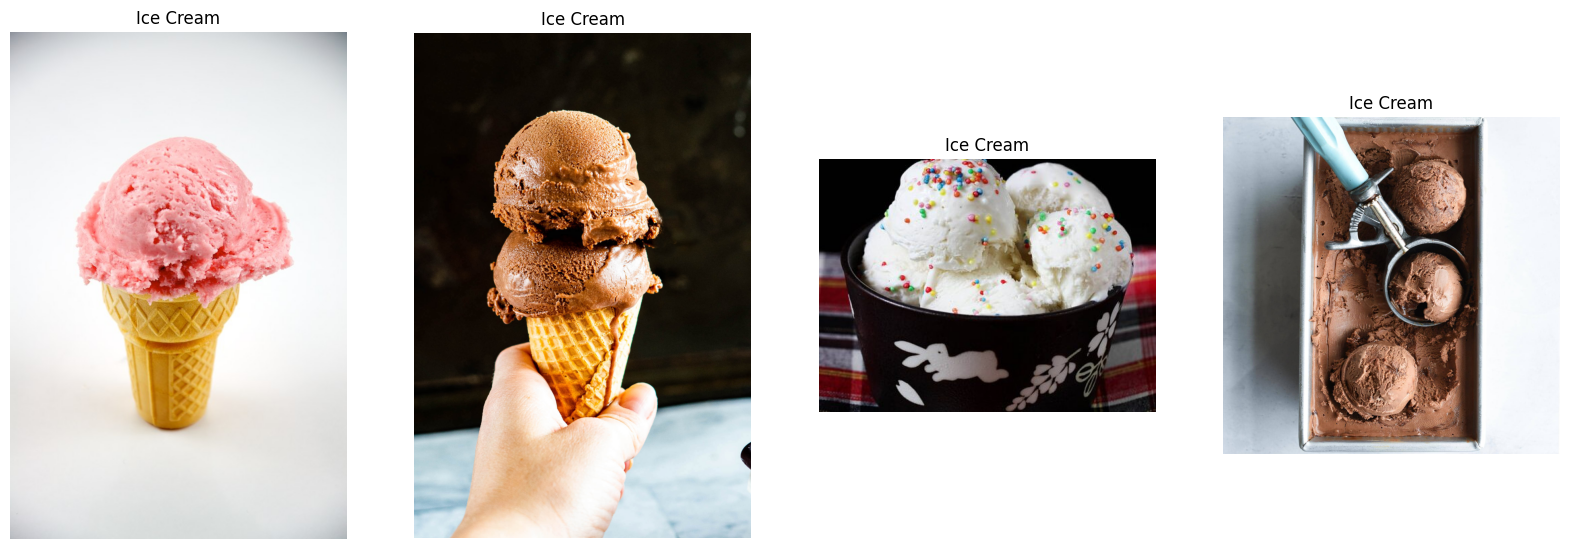

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(20, 20))

for i in range(1, 5):
    file_name = "/kaggle/input/diary-products-computer-vision/diary-products/train/ice cream/" + str(i+2) + ".jpg"
    image = imread(file_name)
    ax = axs[i-1]
    ax.set_title("Ice Cream")
    ax.imshow(image)
    ax.axis('off') 
    
plt.show()

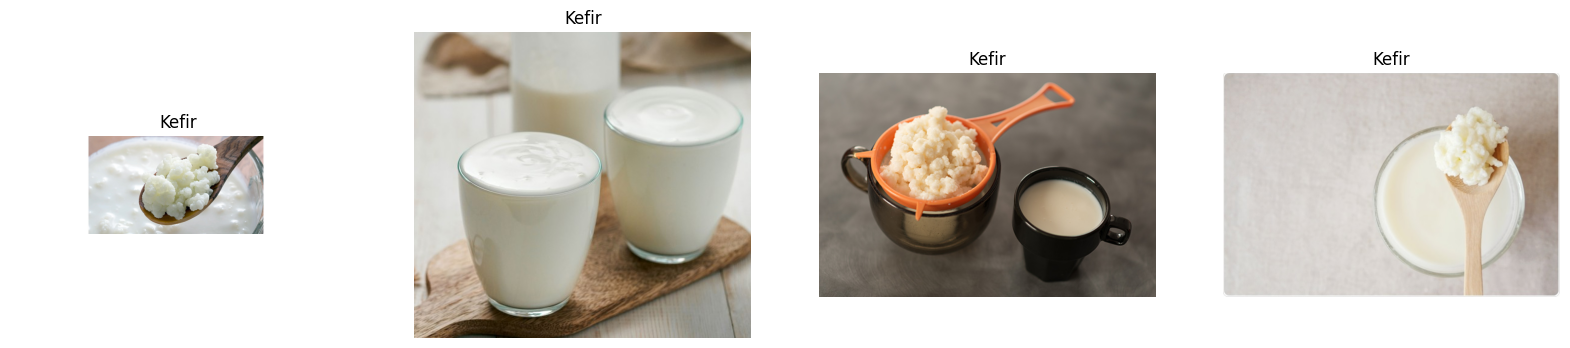

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(20, 20))

for i in range(1, 5):
    file_name = "/kaggle/input/diary-products-computer-vision/diary-products/train/kefir/" + str(i+9) + ".jpg"
    image = imread(file_name)
    ax = axs[i-1]
    ax.set_title("Kefir")
    ax.imshow(image)
    ax.axis('off') 
    
plt.show()

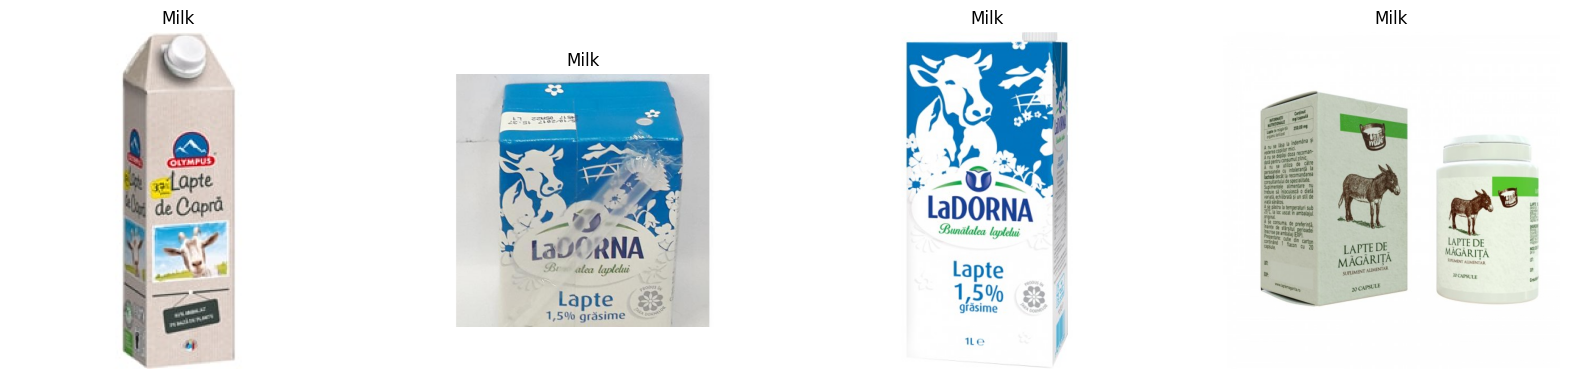

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(20, 20))

for i in range(1, 5):
    file_name = "/kaggle/input/diary-products-computer-vision/diary-products/train/milk/" + str(i+14) + ".jpg"
    image = imread(file_name)
    ax = axs[i-1]
    ax.set_title("Milk")
    ax.imshow(image)
    ax.axis('off') 
    
plt.show()

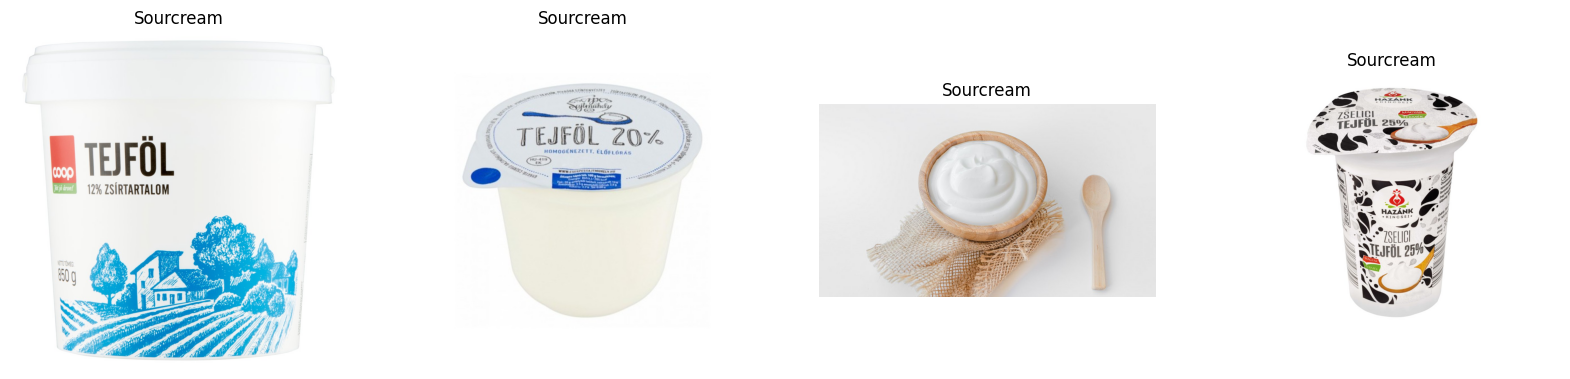

In [15]:
fig, axs = plt.subplots(1, 4, figsize=(20, 20))

for i in range(1, 5):
    file_name = "/kaggle/input/diary-products-computer-vision/diary-products/train/sourcream/" + str(i+5) + ".jpg"
    image = imread(file_name)
    ax = axs[i-1]
    ax.set_title("Sourcream")
    ax.imshow(image)
    ax.axis('off') 
    
plt.show()

### Vectorizing each image in the dataset

In [16]:
vectorizor = Img2Vec()
train_df['Image Vectors'] = train_df['file_path'].apply(lambda x : vectorizor.get_vec(Image.open(x).convert('RGB'), tensor=True).numpy().reshape(512,))

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 156MB/s]


In [17]:
vectorizor = Img2Vec()
test_df['Image Vectors'] = test_df['file_path'].apply(lambda x : vectorizor.get_vec(Image.open(x).convert('RGB'), tensor=True).numpy().reshape(512,))

### Data Modelling 

Model is cached so hyperameter tuning is faster

In [18]:
model = make_pipeline(
    MLPClassifier(),
    memory='cache'
)

In [19]:
model.fit(train_df['Image Vectors'].apply(pd.Series), train_df['label'])

Pipeline(memory='cache', steps=[('mlpclassifier', MLPClassifier())])

In [20]:
y_pred = model.predict(test_df['Image Vectors'].apply(pd.Series))

In [21]:
print(classification_report(test_df['label'], y_pred))

                precision    recall  f1-score   support

        Butter       0.74      0.81      0.77        31
        Cheese       0.88      0.78      0.82        45
Cottage Cheese       0.78      0.90      0.84        31
         Cream       0.69      0.55      0.61        20
     Ice Cream       0.89      0.95      0.92        58
         Kefir       0.74      0.78      0.76        37
          Milk       0.92      0.68      0.78        34
    Sour Cream       0.81      0.91      0.85        32

      accuracy                           0.82       288
     macro avg       0.80      0.79      0.79       288
  weighted avg       0.82      0.82      0.81       288



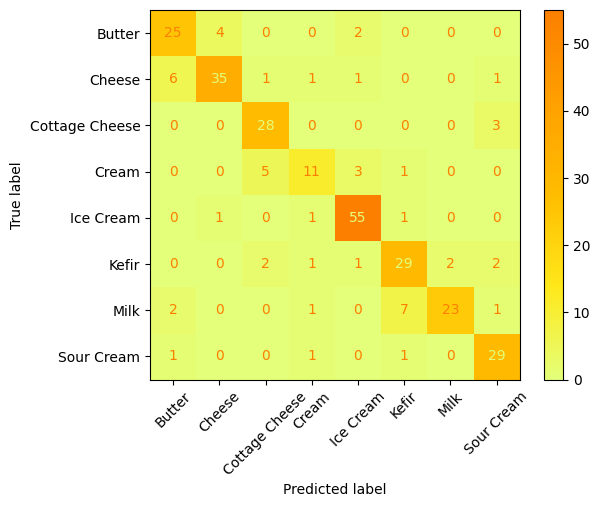

In [22]:
ConfusionMatrixDisplay.from_predictions(test_df['label'], y_pred, cmap='Wistia', xticks_rotation=45)
plt.show()

In [23]:
model.get_params()

{'memory': 'cache',
 'steps': [('mlpclassifier', MLPClassifier())],
 'verbose': False,
 'mlpclassifier': MLPClassifier(),
 'mlpclassifier__activation': 'relu',
 'mlpclassifier__alpha': 0.0001,
 'mlpclassifier__batch_size': 'auto',
 'mlpclassifier__beta_1': 0.9,
 'mlpclassifier__beta_2': 0.999,
 'mlpclassifier__early_stopping': False,
 'mlpclassifier__epsilon': 1e-08,
 'mlpclassifier__hidden_layer_sizes': (100,),
 'mlpclassifier__learning_rate': 'constant',
 'mlpclassifier__learning_rate_init': 0.001,
 'mlpclassifier__max_fun': 15000,
 'mlpclassifier__max_iter': 200,
 'mlpclassifier__momentum': 0.9,
 'mlpclassifier__n_iter_no_change': 10,
 'mlpclassifier__nesterovs_momentum': True,
 'mlpclassifier__power_t': 0.5,
 'mlpclassifier__random_state': None,
 'mlpclassifier__shuffle': True,
 'mlpclassifier__solver': 'adam',
 'mlpclassifier__tol': 0.0001,
 'mlpclassifier__validation_fraction': 0.1,
 'mlpclassifier__verbose': False,
 'mlpclassifier__warm_start': False}

In [24]:
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(256, 128), (512, 256), (1024, 512), 256, 512, 1024],
    'mlpclassifier__learning_rate': ['constant', 'adaptive'],
    'mlpclassifier__activation' : ['tanh', 'relu'],
    'mlpclassifier__max_iter': np.arange(200, 1200, 200),
    'mlpclassifier__solver': ['lbfgs', 'sgd', 'adam'],
    'mlpclassifier__learning_rate_init': [0.001, 0.01, 0.1],
    'mlpclassifier__tol': [1e-4, 1e-3, 1e-2],
}

tuned_model = RandomizedSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=0, n_iter=15)

tuned_model.fit(train_df['Image Vectors'].apply(pd.Series), train_df['label'])

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(memory='cache',
                                      steps=[('mlpclassifier',
                                              MLPClassifier())]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'mlpclassifier__activation': ['tanh',
                                                                      'relu'],
                                        'mlpclassifier__hidden_layer_sizes': [(256,
                                                                               128),
                                                                              (512,
                                                                               256),
                                                                              (1024,
                                                                               512),
                                                                              256,
                                                                              512,
                                                                              1024],
                                        'mlpclassifier__learning_rate': ['constant',
                                                                         'adaptive'],
                                        'mlpclassifier__learning_rate_init': [0.001,
                                                                              0.01,
                                                                              0.1],
                                        'mlpclassifier__max_iter': array([ 200,  400,  600,  800, 1000]),
                                        'mlpclassifier__solver': ['lbfgs',
                                                                  'sgd',
                                                                  'adam'],
                                        'mlpclassifier__tol': [0.0001, 0.001,
                                                               0.01]})

In [25]:
y_pred_tuned = tuned_model.predict(test_df['Image Vectors'].apply(pd.Series))

In [26]:
tuned_model.best_estimator_

Pipeline(memory='cache',
         steps=[('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=1024,
                               learning_rate='adaptive', learning_rate_init=0.1,
                               max_iter=400, solver='sgd', tol=0.001))])

In [27]:
print(classification_report(test_df['label'], y_pred_tuned))

                precision    recall  f1-score   support

        Butter       0.84      0.87      0.86        31
        Cheese       0.88      0.80      0.84        45
Cottage Cheese       0.76      0.84      0.80        31
         Cream       0.50      0.45      0.47        20
     Ice Cream       0.83      0.86      0.85        58
         Kefir       0.82      0.76      0.79        37
          Milk       0.84      0.76      0.80        34
    Sour Cream       0.76      0.91      0.83        32

      accuracy                           0.80       288
     macro avg       0.78      0.78      0.78       288
  weighted avg       0.80      0.80      0.80       288



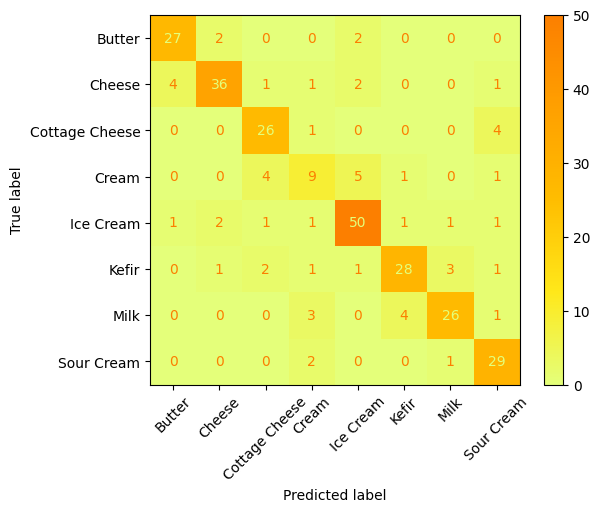

In [28]:
ConfusionMatrixDisplay.from_predictions(test_df['label'], y_pred_tuned, cmap='Wistia', xticks_rotation=45)